In [ ]:
#AlexNet Model
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

!pip install imutils


In [ ]:
import numpy as np
import pandas as pd
import os
from imutils import paths
import matplotlib.pyplot as plt
import argparse
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split


In [ ]:
dataset = "/content/sample_data/dataset"


In [ ]:
args={}
args["dataset"]=dataset


In [ ]:
import cv2
iPaths = list(paths.list_images(args["dataset"]))
data = []
labels = []
for iPath in iPaths:
    label = iPath.split(os.path.sep)[-2]
    image = cv2.imread(iPath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (227, 227))
    data.append(image)
    labels.append(label)
data = np.array(data) / 255.0
labels = np.array(labels)


In [ ]:
import os

Data_Dir = "/content/sample_data/dataset"

if os.path.exists(Data_Dir):
    print(os.listdir(Data_Dir))
else:
    print("Data directory does not exist!")

Data_Dir = "/content/sample_data/dataset"
Cimages = os.listdir(os.path.join(Data_Dir, "covid"))
Nimages = os.listdir(os.path.join(Data_Dir, "normal"))


['.ipynb_checkpoints', 'covid', 'normal']


Normal Chest X-ray Vs Covid-19 Chest X-ray


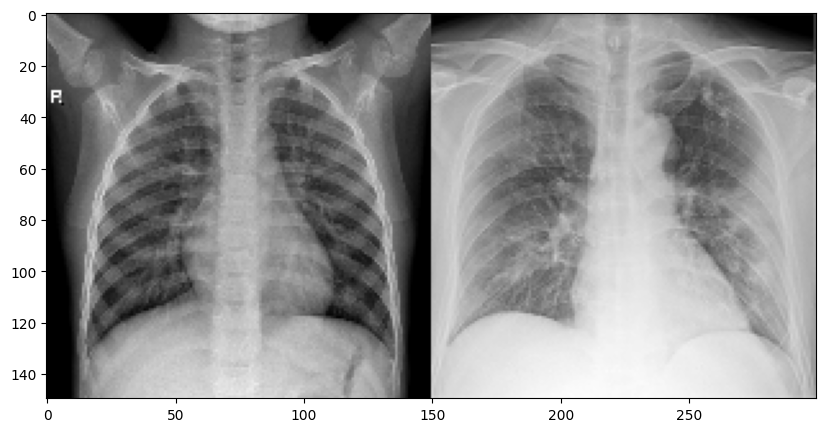

Normal Chest X-ray Vs Covid-19 Chest X-ray


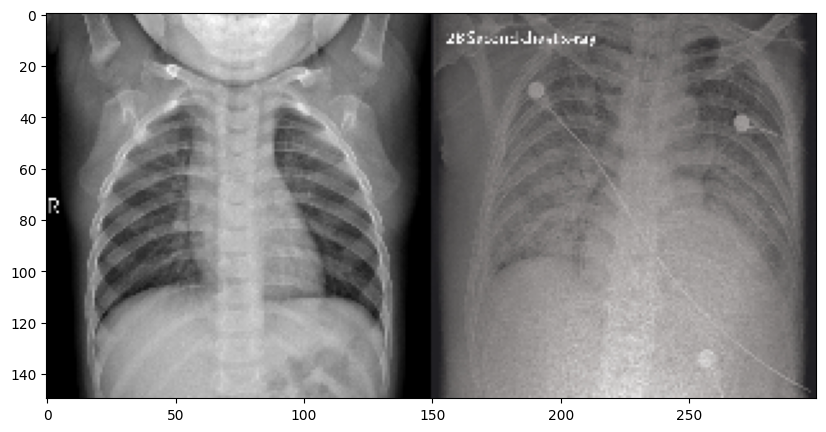

Normal Chest X-ray Vs Covid-19 Chest X-ray


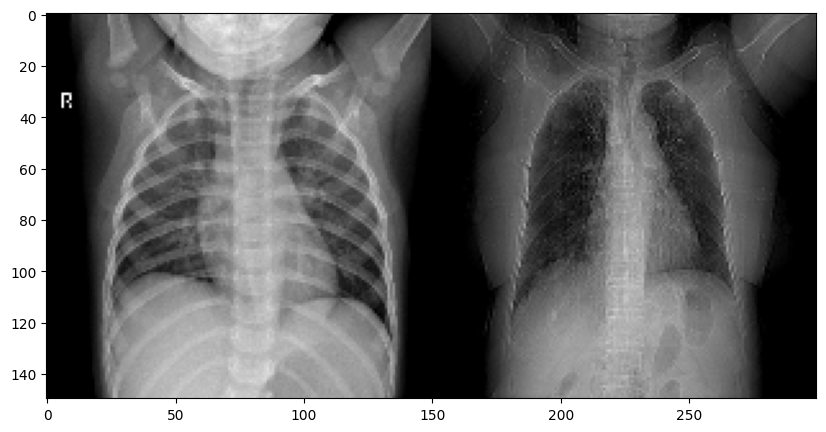

Normal Chest X-ray Vs Covid-19 Chest X-ray


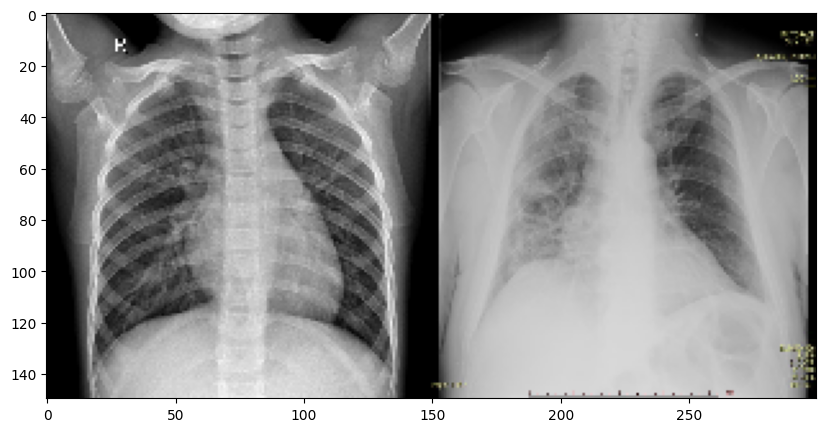

Normal Chest X-ray Vs Covid-19 Chest X-ray


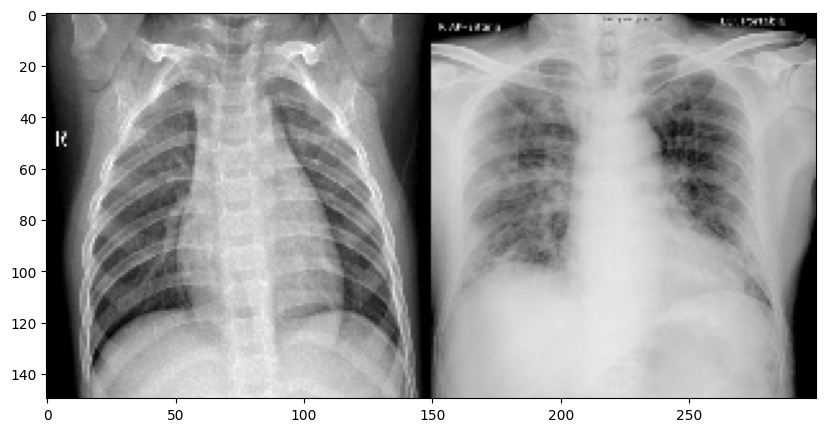

In [ ]:
def plotter(i):
    try:
        normal = cv2.imread(Data_Dir + "/normal/" + Nimages[i])
        if normal is None:
            raise ValueError("Failed to read normal image:", Nimages[i])
        normal = cv2.resize(normal, (150, 150))

        coronavirus = cv2.imread(Data_Dir + "/covid/" + Cimages[i])
        if coronavirus is None:
            raise ValueError("Failed to read coronavirus image:", Cimages[i])
        coronavirus = cv2.resize(coronavirus, (150, 150))

        pair = np.concatenate((normal, coronavirus), axis=1)

        print("Normal Chest X-ray Vs Covid-19 Chest X-ray")
        plt.figure(figsize=(10, 5))
        plt.imshow(pair)
        plt.show()

    except Exception as e:
        print("Error:", str(e))

for i in range(0, 5):
    plotter(i)


In [ ]:
LB = LabelBinarizer()
labels = LB.fit_transform(labels)
labels = to_categorical(labels)
print(labels)
(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels,
    test_size=0.20, stratify=labels, random_state=42)
trainAug = ImageDataGenerator(
    rotation_range=15,
    fill_mode="nearest")


[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [ ]:
input_shape = (227, 227, 3)


In [ ]:
# Define the input layer
inputs = Input(shape=input_shape)

# First convolutional block
x = Conv2D(96, (11, 11), strides=(4, 4), activation='relu')(inputs)
x = MaxPooling2D((3, 3), strides=(2, 2))(x)

# Second convolutional block
x = Conv2D(256, (5, 5), padding='same', activation='relu')(x)
x = MaxPooling2D((3, 3), strides=(2, 2))(x)

# Third convolutional block
x = Conv2D(384, (3, 3), padding='same', activation='relu')(x)

# Fourth convolutional block
x = Conv2D(384, (3, 3), padding='same', activation='relu')(x)

# Fifth convolutional block
x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D((3, 3), strides=(2, 2))(x)


In [ ]:
# Flatten the output
x = Flatten()(x)

# Fully connected layers
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)

# Output layer
outputs = Dense(2, activation='softmax')(x)


/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


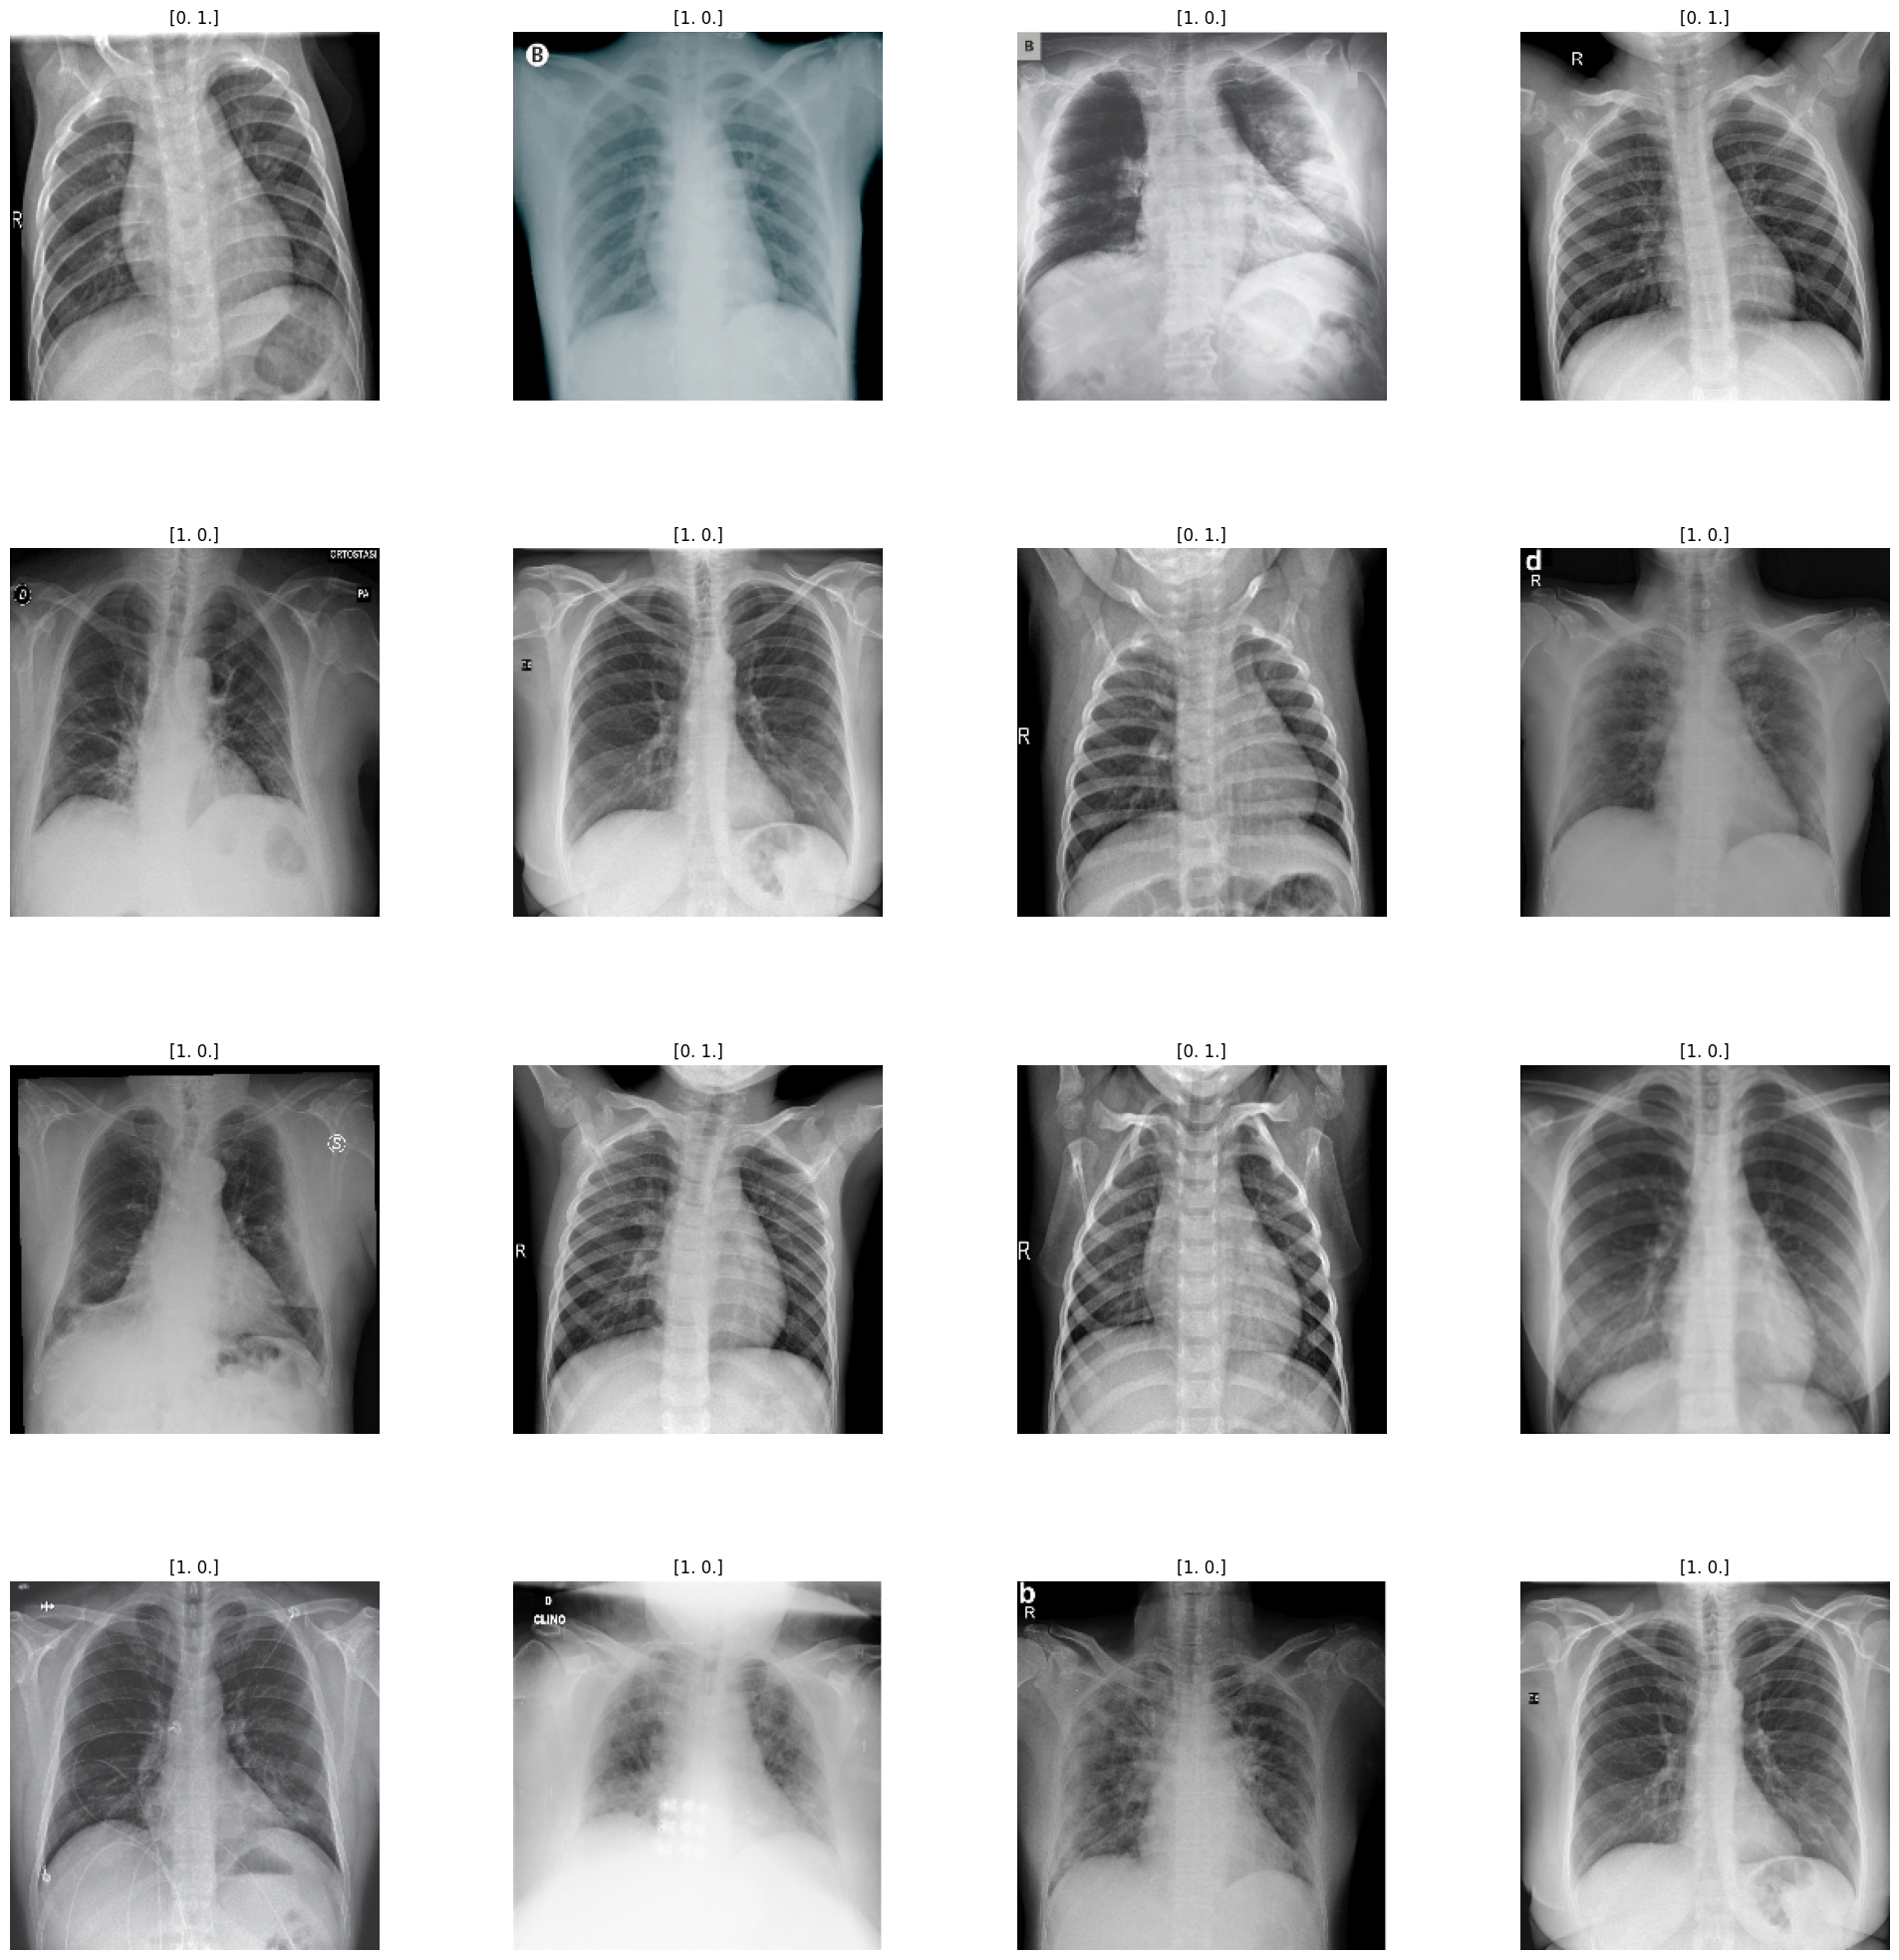

In [ ]:
# Create the model
model = Model(inputs=inputs, outputs=outputs)

W_grid = 4
L_grid = 4
fig, axes = plt.subplots(L_grid, W_grid, figsize=(25, 25))
axes = axes.ravel()
n_training = len(X_train)
for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(Y_train[index])
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)



In [ ]:
INIT_LR = 1e-3
EPOCHS = 30
BS = 8


In [ ]:
opt = Adam(learning_rate=INIT_LR)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
print("Compiling Starts")

R = model.fit_generator(
    trainAug.flow(X_train, Y_train, batch_size=BS),
    steps_per_epoch=len(X_train) // BS,
    validation_data=(X_test, Y_test),
    validation_steps=len(X_test) // BS,
    epochs=EPOCHS
)


Compiling Starts


<ipython-input-15-423ab1c6586f>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  R = model.fit_generator(


Epoch 1/30
9/9 [==============================] - 36s 4s/step - loss: 0.3663 - accuracy: 0.8657 - val_loss: 0.3676 - val_accuracy: 0.7895
Epoch 2/30
9/9 [==============================] - 20s 2s/step - loss: 0.3055 - accuracy: 0.8806 - val_loss: 0.4344 - val_accuracy: 0.8421
Epoch 3/30
9/9 [==============================] - 18s 2s/step - loss: 0.5016 - accuracy: 0.8194 - val_loss: 0.5786 - val_accuracy: 0.7895
Epoch 4/30
9/9 [==============================] - 20s 2s/step - loss: 0.4996 - accuracy: 0.8060 - val_loss: 0.2999 - val_accuracy: 0.8947
Epoch 5/30
9/9 [==============================] - 18s 2s/step - loss: 0.1426 - accuracy: 0.9552 - val_loss: 0.3902 - val_accuracy: 0.8421
Epoch 6/30
9/9 [==============================] - 22s 2s/step - loss: 0.3973 - accuracy: 0.8507 - val_loss: 0.1260 - val_accuracy: 0.9474
Epoch 7/30
9/9 [==============================] - 19s 2s/step - loss: 0.0704 - accuracy: 0.9552 - val_loss: 0.1364 - val_accuracy: 0.9474
Epoch 8/30
9/9 [==================

3/3 [==============================] - 2s 388ms/step


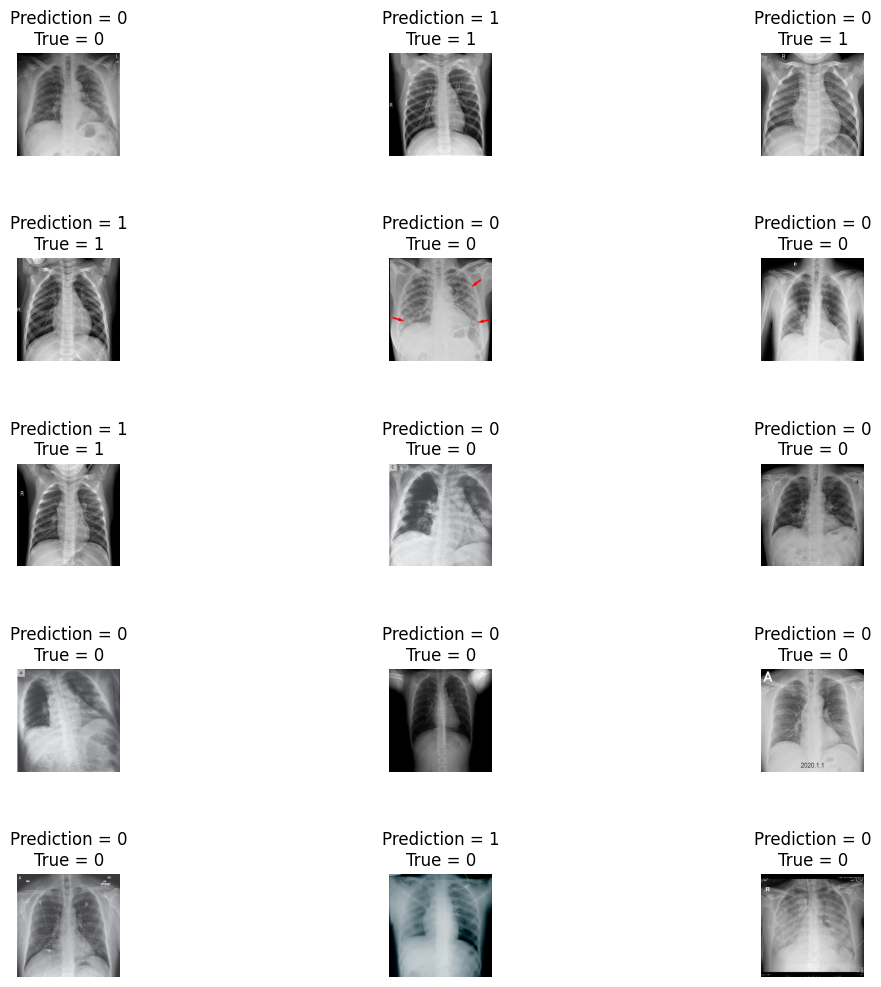

In [ ]:
L = 5
W = 3
fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()
y_pred = model.predict(X_test, batch_size=BS)
for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\nTrue = {}'.format(y_pred.argmax(axis=1)[i],
                                                          Y_test.argmax(axis=1)[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1, hspace=1)


In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test, batch_size=BS)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(Y_test.argmax(axis=1), y_pred, target_names=LB.classes_))


3/3 [==============================] - 1s 231ms/step
              precision    recall  f1-score   support

       covid       0.93      0.93      0.93        14
      normal       0.80      0.80      0.80         5

    accuracy                           0.89        19
   macro avg       0.86      0.86      0.86        19
weighted avg       0.89      0.89      0.89        19



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test.argmax(axis=1), y_pred)


0.8947368421052632

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test.argmax(axis=1), y_pred)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))


[[13  1]
 [ 1  4]]
acc: 0.8947
sensitivity: 0.9286
specificity: 0.8000


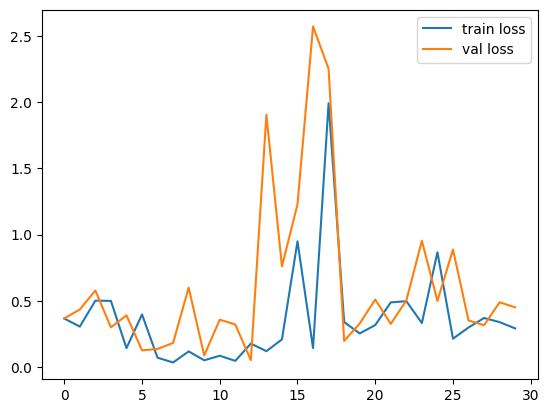

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(R.history['loss'], label='train loss')
plt.plot(R.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')



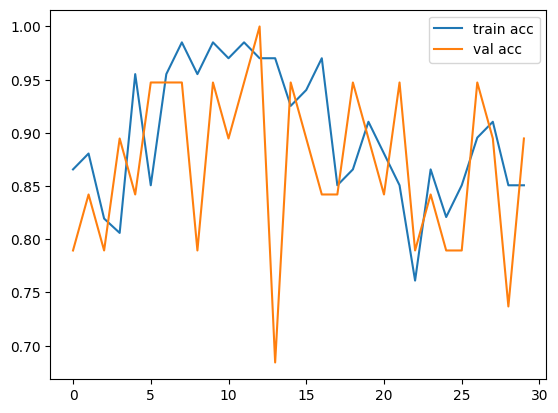

In [ ]:
# plot the accuracy
plt.plot(R.history['accuracy'], label='train acc')
plt.plot(R.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


In [ ]:
model.save('Covid_model.h5')


1/1 [==============================] - 0s 169ms/step
Prediction: Corona


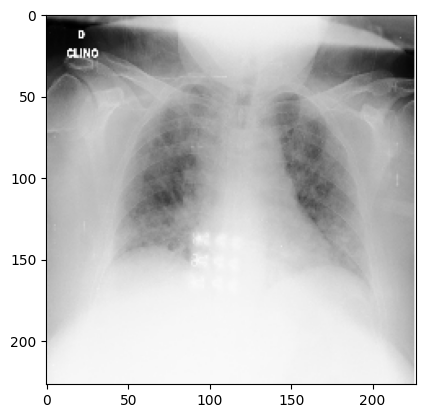

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

model = tf.keras.models.load_model('Covid_model.h5')

img = tf.keras.preprocessing.image.load_img('/content/sample_data/dataset/covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg', target_size=(227, 227))
input_shape = (227, 227, 3)
inputs = Input(shape=input_shape)
imgplot = plt.imshow(img)

x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = x / 255.0  # Normalize the image data

classes = model.predict(img_data)
New_pred = np.argmax(classes, axis=1)
if New_pred == 1:
    print('Prediction: Normal')
else:
    print('Prediction: Corona')


1/1 [==============================] - 1s 607ms/step
Prediction: Normal


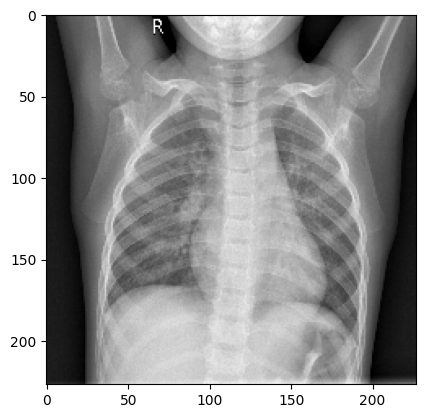

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

model = tf.keras.models.load_model('Covid_model.h5')

img = tf.keras.preprocessing.image.load_img('/content/sample_data/dataset/normal/IM-0115-0001.jpeg', target_size=(227, 227))
input_shape = (227, 227, 3)
inputs = Input(shape=input_shape)
imgplot = plt.imshow(img)

x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = x / 255.0  # Normalize the image data

classes = model.predict(img_data)
New_pred = np.argmax(classes, axis=1)
if New_pred == 1:
    print('Prediction: Corona')
else:
    print('Prediction: Normal')